# Operações pontuais globais em imagem

*Ultima modificação em em 2025-09-02*


## Importações

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

import utils as ut

## Codigo

### Leitura da imagem

In [2]:
IMG_PATH = Path("contraste.webp")

image = cv.imread(str(IMG_PATH), cv.IMREAD_COLOR)

if image is None:
    raise FileNotFoundError(f"Não consegui ler o arquivo: {IMG_PATH.resolve()}")

print("Imagem carregada com sucesso!")

Imagem carregada com sucesso!


### Análise exploratória

In [3]:
ut.eda_image(image)

Largura em pixels: 424
Altura em pixels: 640
Quantidade de pixels: 271360
Quantidade de elementos presentes na matriz: 814080
Quantidade de canais: 3


### Criando canal cinza

In [4]:
grayChannel = ut.generate_gray_channel(image)

cv.imshow("Imagem recriada", grayChannel)
cv.waitKey(0)

-1

### Histograma da imagem

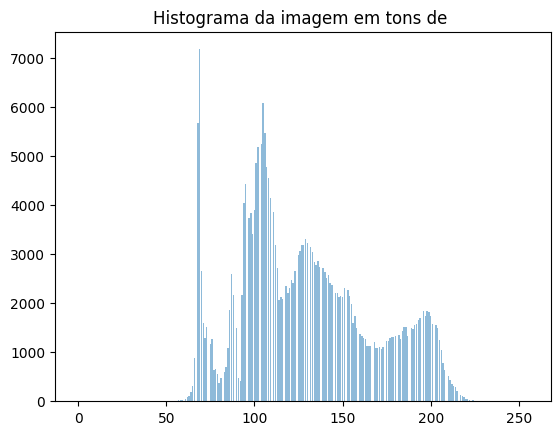

In [5]:
pixel = 256*[0]

for i in range(256):
    pixel[i] = i

plt.title(f'Histograma da imagem em tons de ')
plt.bar(pixel, ut.histograma(grayChannel), alpha=0.5,)
plt.show()

## Operações pontuais em imagens (8-bit)

**Ideia:** em uma operação pontual, cada pixel de entrada \( r \) é transformado **independentemente** por uma função \( s = f(r) \).  
Para imagens em escala de cinza de 8 bits, \( r \in [0, 255] \) e o resultado também deve ser mantido em \( s \in [0, 255] \) (com *clipping* ao final).

### Ajuste linear: contraste e luminosidade

A forma mais comum é a transformação **linear**:
\[
s = f(r) = c\,r + ℓ
\]

- \( c \) (*contrast*):  
  - \( c > 1 \) → aumenta o contraste (expande diferenças).  
  - \( 0 < c < 1 \) → reduz o contraste (comprime diferenças).
- ℓ (*luminosity/brightness*):
  - ℓ > 0 → clareia (desloca tons para cima).
  - ℓ < 0 → escurece (desloca tons para baixo).

> Após aplicar a fórmula, **faça `clip`** para o intervalo \([0, 255]\).

**Exemplos rápidos (com *clipping*):**
- \( s = 2r \) → aumenta contraste.  
- \( s = r + 100 \) → clareia a imagem.

### Curvas de tom (*tone curves*) úteis

Além do ajuste linear, algumas curvas clássicas:

1. **Linear geral**  
   \( s = c\,r + ℓ \) — controle direto de contraste e brilho.
2. **Aumento simples de contraste**  
   \( s = 2r \) (fazendo *clipping* em 255).
3. **Clareamento simples**  
   \( s = r + 100 \) (fazendo *clipping* em 255).
4. **Parabólica (reforça sombras, escurece médios)**

    $$ s = 255 \left(\frac{r}{255}\right)^2 $$

    Observação: usar **255** (e não 256) na normalização evita viés.
5. **Inversão (negativo)**  
   \( s = 255 - r \)

### Tabela de exemplo (valores aproximados, com *clipping*)

| \(r\) | \(2r\) | \(r+100\) | Parabólica \(255(r/255)^2\) | Invertida \(255-r\) |
|---:|---:|---:|---:|---:|
| 64  | 128 | 164 | ~16  | 191 |
| 128 | 255 | 228 | ~64  | 127 |
| 192 | 255 | 255 | ~144 | 63  |

> Perceba como a curva **parabólica** “puxa” tons médios para baixo (escurece), mantendo \(0 \rightarrow 0\) e \(255 \rightarrow 255\).


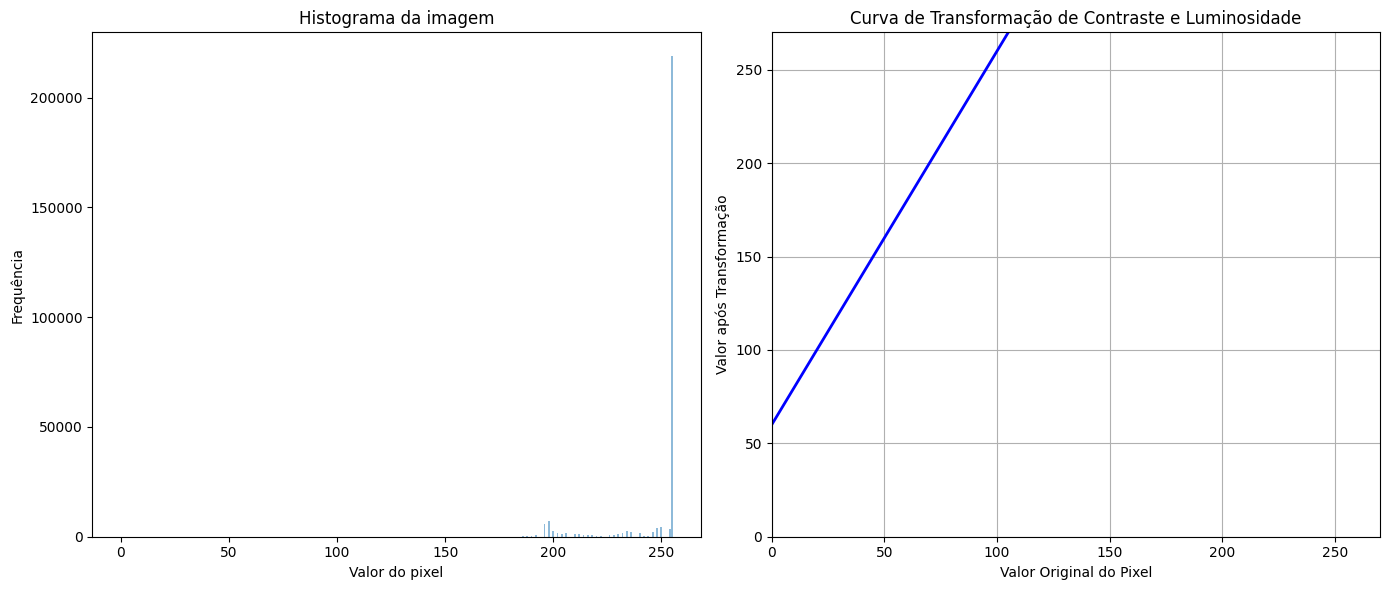

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [230, 222, 220, ..., 255, 255, 255],
       [232, 232, 228, ..., 255, 255, 255],
       [222, 234, 236, ..., 255, 255, 255]], shape=(424, 640), dtype=uint8)

In [6]:
grayCopy = grayChannel.copy()
ut.manipulate_contrast_luminosity(grayCopy, 2, 60)

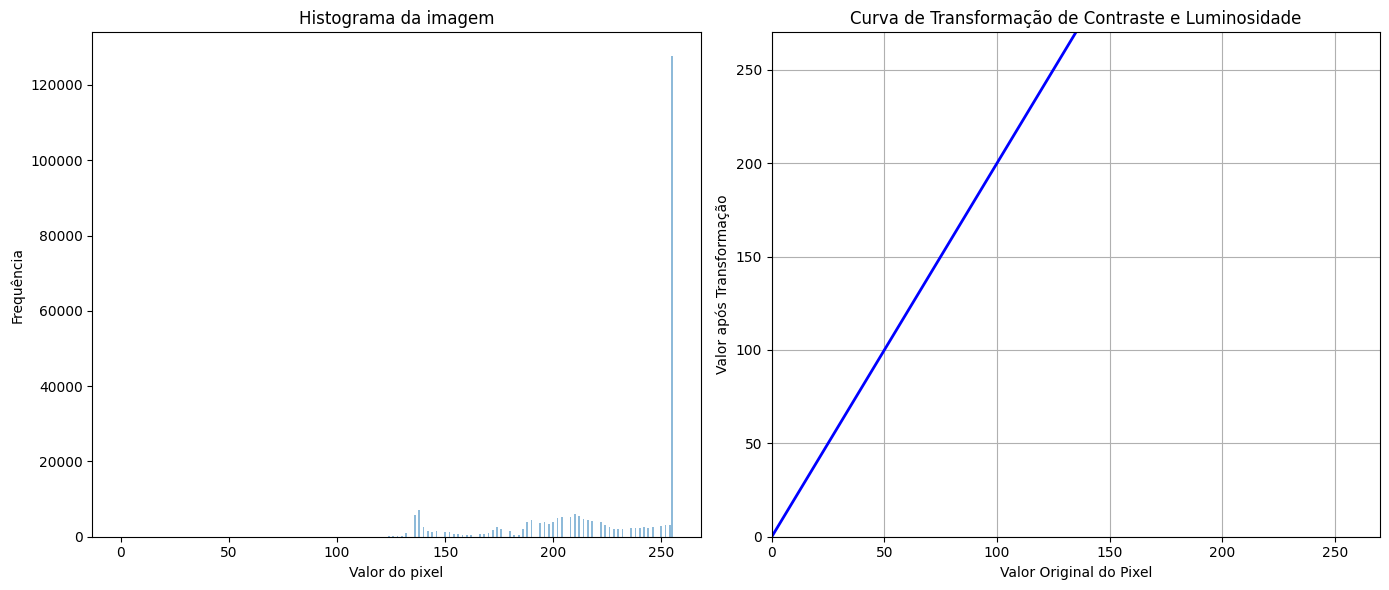

array([[202, 202, 202, ..., 196, 198, 198],
       [202, 202, 202, ..., 196, 198, 198],
       [202, 202, 202, ..., 196, 198, 198],
       ...,
       [170, 162, 160, ..., 255, 255, 255],
       [172, 172, 168, ..., 255, 255, 255],
       [162, 174, 176, ..., 255, 255, 255]], shape=(424, 640), dtype=uint8)

In [7]:
grayCopy = grayChannel.copy()
ut.manipulate_contrast_luminosity(grayCopy, 2, 0)

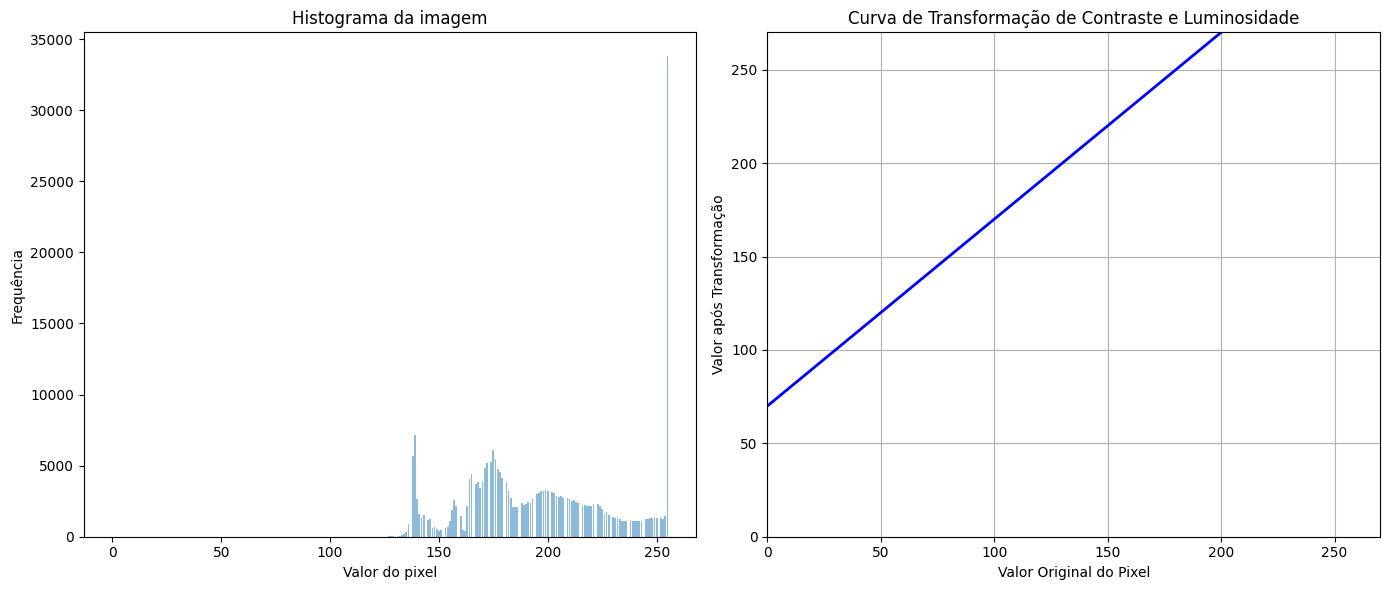

array([[171, 171, 171, ..., 168, 169, 169],
       [171, 171, 171, ..., 168, 169, 169],
       [171, 171, 171, ..., 168, 169, 169],
       ...,
       [155, 151, 150, ..., 220, 223, 219],
       [156, 156, 154, ..., 226, 218, 206],
       [151, 157, 158, ..., 216, 217, 223]], shape=(424, 640), dtype=uint8)

In [8]:
grayCopy = grayChannel.copy()
ut.manipulate_contrast_luminosity(grayCopy, 1, 70)

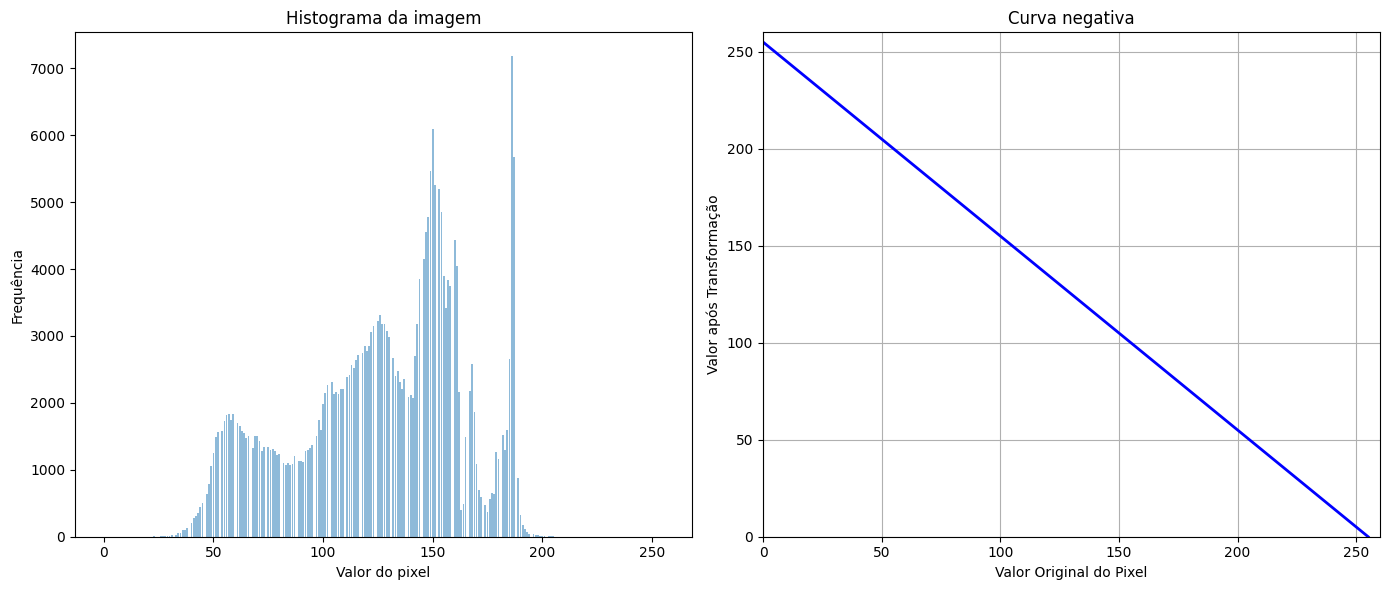

array([[154, 154, 154, ..., 157, 156, 156],
       [154, 154, 154, ..., 157, 156, 156],
       [154, 154, 154, ..., 157, 156, 156],
       ...,
       [170, 174, 175, ..., 105, 102, 106],
       [169, 169, 171, ...,  99, 107, 119],
       [174, 168, 167, ..., 109, 108, 102]], shape=(424, 640), dtype=uint8)

In [17]:
grayCopy = grayChannel.copy()
ut.manipulate_contrast_luminosity(grayCopy, 0, 0, 'invertido')

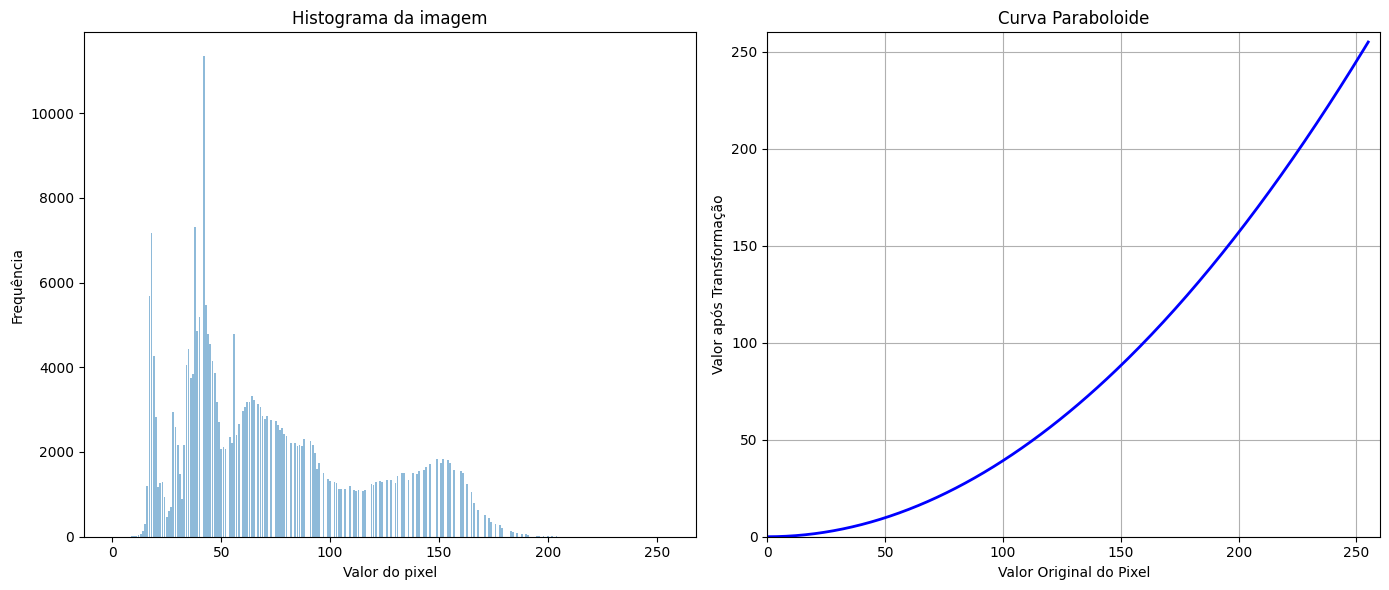

array([[39, 39, 39, ..., 37, 38, 38],
       [39, 39, 39, ..., 37, 38, 38],
       [39, 39, 39, ..., 37, 38, 38],
       ...,
       [28, 25, 24, ..., 87, 91, 86],
       [28, 28, 27, ..., 94, 85, 71],
       [25, 29, 30, ..., 82, 84, 91]], shape=(424, 640), dtype=uint8)

In [18]:
grayCopy = grayChannel.copy()
ut.manipulate_contrast_luminosity(grayCopy, 0, 0, 'parabolica')